In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
# Resolutions
runtimes = {
    (64, 180, 49): 20.5,
    (64, 180, 89): 19.1,
    (64, 180, 179): 16.5,
    (64, 180, 359): 14.1,
    (64, 180, 719): 10.2,
    (32, 180, 359): 16.5,
    (64, 180, 359): 13.8,
    (128, 180, 359): 10.1,
    (256, 180, 359): 6.6,
}

In [28]:
runtimes_by_total = {
    np.prod(resolution): runtime
    for resolution, runtime in runtimes.items()
}

# Sort by total resolution
runtimes_by_total = sorted(runtimes_by_total.items(), key=lambda x: x[0])
# Convert to dict
runtimes_by_total = dict(runtimes_by_total)
runtimes_by_total

{564480: 20.5,
 1025280: 19.1,
 2062080: 16.5,
 2067840: 16.5,
 4135680: 13.8,
 8271360: 10.1,
 8282880: 10.2,
 16542720: 6.6}

In [29]:
# Fit a curve to the sorted runtimes
x = np.array(list(runtimes_by_total.keys()))
y = np.array(list(runtimes_by_total.values()))
degree = 1
fit = np.polyfit(x, 1/y, degree)
fit_fn = np.poly1d(fit)


# Format the fit function nicely.
def format_fn(fit_fn):
    for i in range(degree + 1):
        print(f"{fit_fn[degree - i]} x^{degree - i}", end="")
        if i != degree:
            print(" + ", end="")

format_fn(fit_fn)

6.347311322299577e-09 x^1 + 0.046343114901479986 x^0

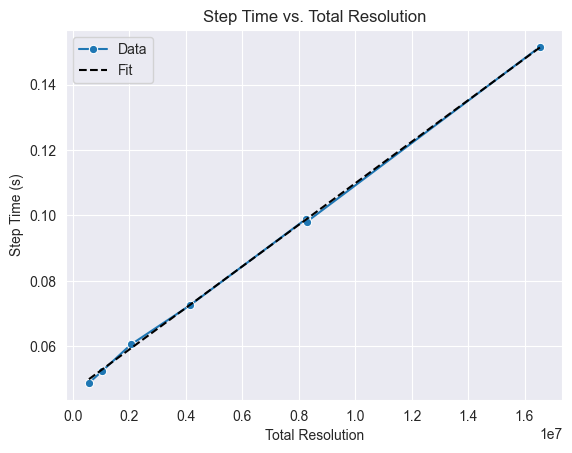

In [30]:
sns.set_style('darkgrid')
sns.lineplot(x=x, y=1/y, marker='o', label="Data")
# Plot the fit
plt.plot(x, fit_fn(x), '--k', label="Fit")
plt.legend()
plt.xlabel("Total Resolution")
plt.ylabel("Step Time (s)")
plt.title("Step Time vs. Total Resolution")
plt.show();